# Experiment case: German Credit

The German Credit data set contains observations on 30 variables for 1000 past applicants for credit. Each applicant was rated as “good credit” (700 cases) or “bad credit” (300 cases).

New applicants for credit can also be evaluated on these 30 "predictor" variables. You need to develop a credit scoring rule that can be used to determine if a new applicant is a good credit risk or a bad credit risk, based on values for one or more of the predictor variables. All the variables are explained in Table 1. (The data has been organized in the spreadsheet German CreditI.xls)
Table 1 variable description 


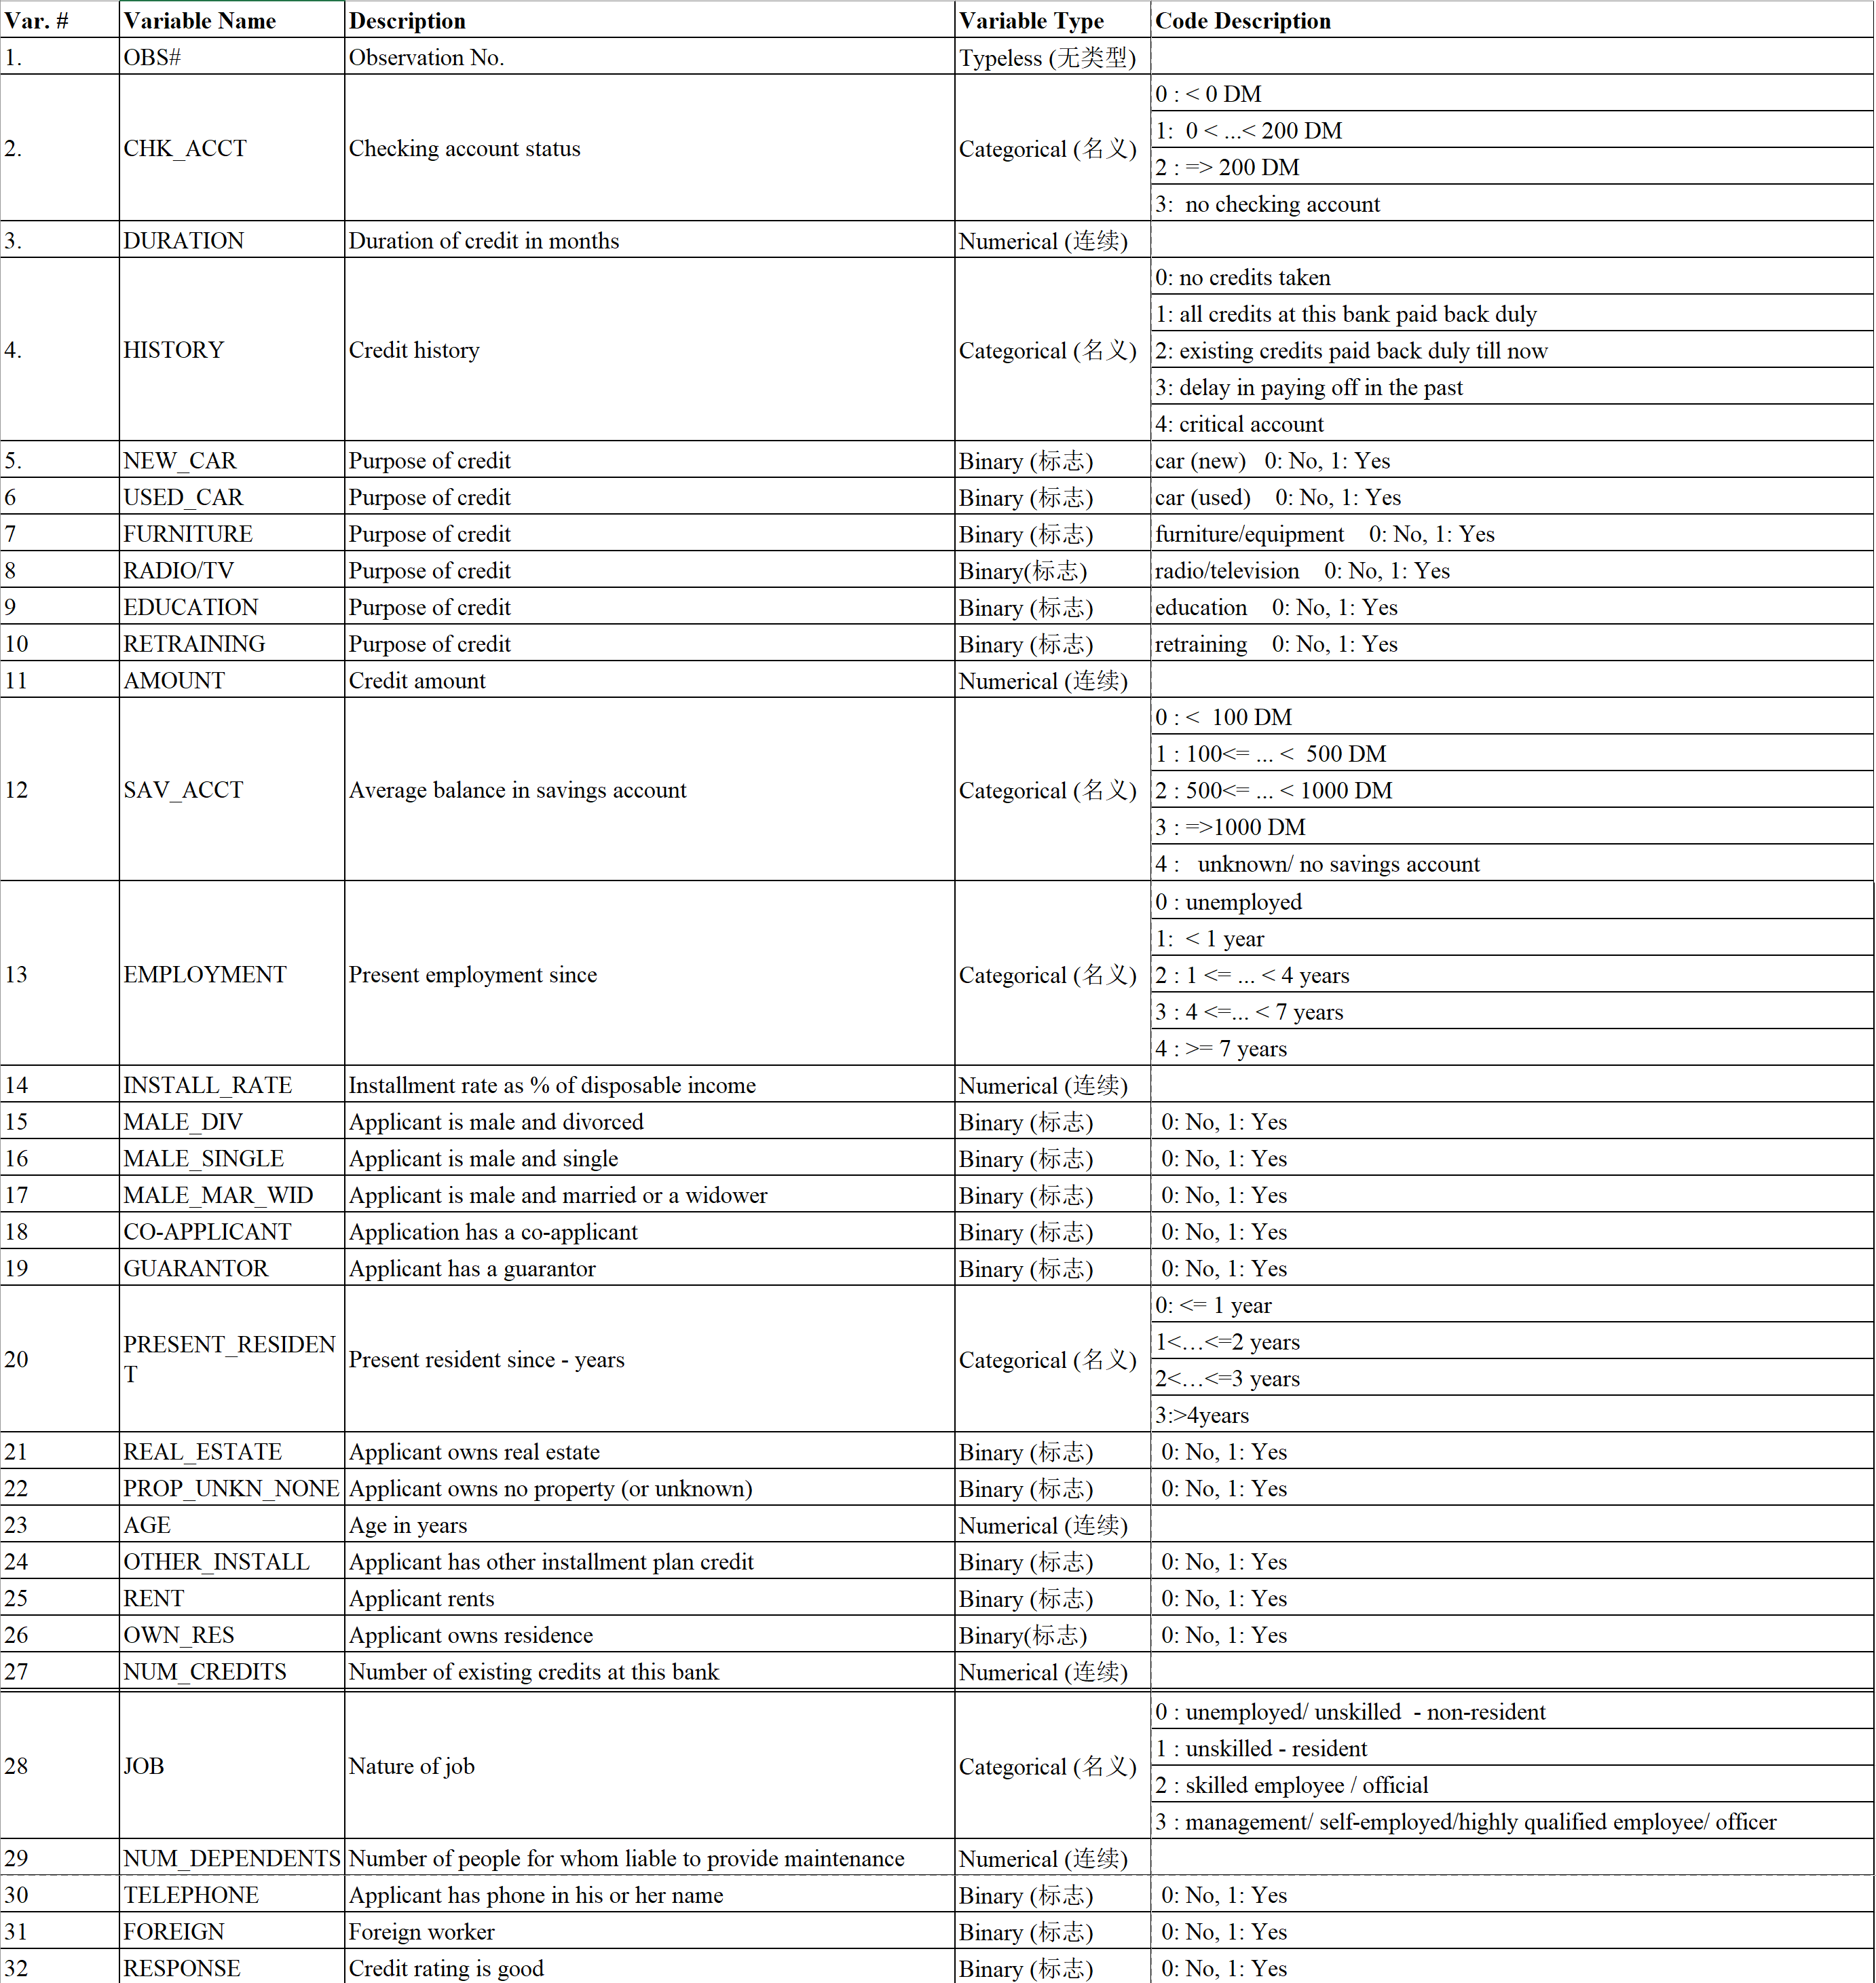

## Modeling Procedure

1.Load the data and check the variables

In [1]:
import pandas as pd
df=pd.read_csv('03GermanCredit.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   FURNITURE         1000 non-null   int64
 7   RADIO/TV          1000 non-null   int64
 8   EDUCATION         1000 non-null   int64
 9   RETRAINING        1000 non-null   int64
 10  AMOUNT            1000 non-null   int64
 11  SAV_ACCT          1000 non-null   int64
 12  EMPLOYMENT        1000 non-null   int64
 13  INSTALL_RATE      1000 non-null   int64
 14  MALE_DIV          1000 non-null   int64
 15  MALE_SINGLE       1000 non-null   int64
 16  MALE_MAR_or_WID   1000 non-null   int64
 17  CO-APPLICANT      1000 non-null   

2. Check the quality(质量) of the data. 

In [2]:
df.isnull().sum()

OBS#                0
CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
RESPONSE            0
dtype: int64

We can see that there are no missing value or null variables in this dataset.

3.The variable ‘RESPONSE’ is the target variable we are going to predict. We can firstly draw the ‘distribution graphs’ (分布) of the nominal variables(名义变量) such as ‘HISTORY’, and ‘histogram graphs’(直方图) of the range variables(连续变量), such as ‘INSTALL_RATE’, ‘AMOUNT’. 

Text(0.5, 1.0, 'HISTORY')

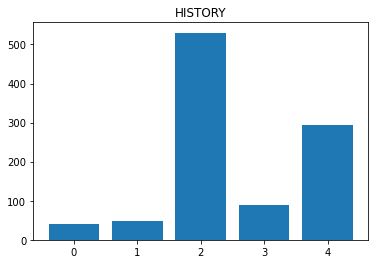

In [3]:
import matplotlib.pyplot as plt
df_stats1=df['HISTORY'].value_counts()
plt.bar(df_stats1.index, df_stats1)
plt.title('HISTORY')

Text(0.5, 1.0, 'INSTALL_RATE')

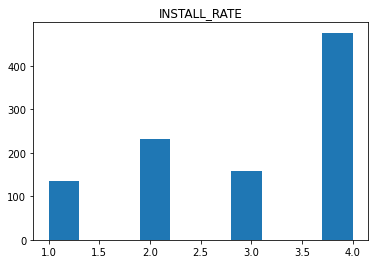

In [4]:
plt.hist(df['INSTALL_RATE'])
plt.title('INSTALL_RATE')

Text(0.5, 1.0, 'AMOUNT')

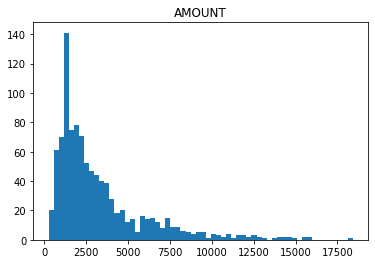

In [5]:
plt.hist(df['AMOUNT'],bins=60) # 'bins' can be used to specify how many boxes to divide into
plt.title('AMOUNT')

In [6]:
## we can also use seaborn package to plot distribution graphs and histgram graphs

<AxesSubplot:xlabel='HISTORY', ylabel='count'>

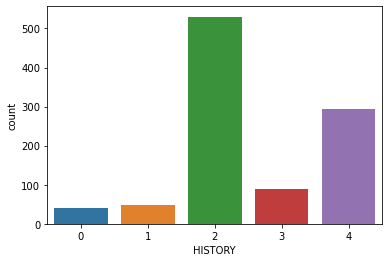

In [7]:
import seaborn as sns
sns.countplot(data=df, x='HISTORY')

<AxesSubplot:xlabel='AMOUNT', ylabel='Count'>

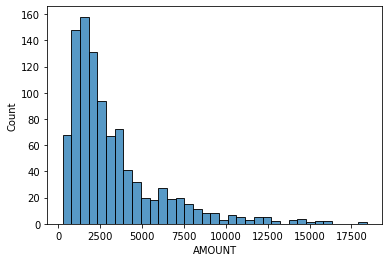

In [8]:
sns.histplot(data=df, x='AMOUNT')

In [9]:
## we can also divide a variable into two groups according to the target variable and visualize the distributions of both groups
## please write relevant codes for 'HISTROY' and 'AMOUNT'
## you can refer to http://seaborn.pydata.org/ 

4.Derive new variables as below:
* Goodhis: indicate whether the clients have good credit history or bad credit history
* House: indicate wether the clients have house or not
* Goodac: indicate whether the clients have checking accounts or not
* Sex: indicate the sex of the clients
* Single: indicate whether the clients are single or not

In [10]:
df['GOODHIS']  = df['HISTORY'].replace({0: 1, 1: 1, 2: 1, 
                                        3: 0, 4: 0}) # 1 means good and 0 means bad


In [11]:
# 1 means yes and 0 means no
def haveHouse(a, b):
    if a==1 or b==1:
        return 1
    else:
        return 0

df['HOUSE'] = df.apply(lambda x: haveHouse(x.REAL_ESTATE, x.OWN_RES), axis = 1)

In [12]:
df['GOODAC']  = df['CHK_ACCT'].replace({0: 1, 1: 1, 2: 1, 
                                        3: 0}) # 1 means yes and 0 means no

In [13]:
# 1 means male and 0 means female
def sex(a, b, c):
    if a==1 or b==1 or c==1:
        return 1
    else:
        return 0
df['SEX'] = df.apply(lambda x: sex(x.MALE_DIV, x.MALE_SINGLE, x.MALE_MAR_or_WID), axis = 1)

In [14]:
def single(a,b):
    if a==0:
        return 3 # female, unknown
    elif b==1:
        return 1 # single
    else:
        return 2 # not single
df['SINGLE'] = df.apply(lambda x: single(x.SEX, x.MALE_SINGLE), axis = 1)

In [15]:
df.drop(['HISTORY', 'REAL_ESTATE', 'OWN_RES', 'CHK_ACCT', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID'], axis=1, inplace=True)

In [16]:
# check the data
df.head(15)

,OBS#,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,...,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE,GOODHIS,HOUSE,GOODAC,SEX,SINGLE
0,1,6,0,0,0,1,0,0,1169,4,...,2,1,1,0,1,0,1,1,1,1
1,2,48,0,0,0,1,0,0,5951,0,...,2,1,0,0,0,1,1,1,0,3
2,3,12,0,0,0,0,1,0,2096,0,...,1,2,0,0,1,0,1,0,1,1
3,4,42,0,0,1,0,0,0,7882,0,...,2,2,0,0,1,1,0,1,1,1
4,5,24,1,0,0,0,0,0,4870,0,...,2,2,0,0,0,0,0,1,1,1
5,6,36,0,0,0,0,1,0,9055,4,...,1,2,1,0,1,1,0,0,1,1
6,7,24,0,0,1,0,0,0,2835,2,...,2,1,0,0,1,1,1,0,1,1
7,8,36,0,1,0,0,0,0,6948,0,...,3,1,1,0,1,1,0,1,1,1
8,9,12,0,0,0,1,0,0,3059,3,...,1,1,0,0,1,1,1,0,1,2
9,10,30,1,0,0,0,0,0,5234,0,...,3,1,0,0,0,0,1,1,1,2


5.Convert all the categorial variables into one-hot vector according to the data description. We can use **get_dummies()** method in pandas to achieve this.

In [17]:
def dummies(data, col_name):
    col_dummies = pd.get_dummies(data[col_name])
    data.drop(col_name,axis=1,inplace=True)
    data = pd.concat([data, col_dummies], axis=1)
    return data

col_dummies = ['SAV_ACCT','EMPLOYMENT','PRESENT_RESIDENT','JOB','SINGLE']
for i in col_dummies:
    df = dummies(df, i)

6.Set the ratio of training and testing as 60:40. We can achieve this by using the method **train_test_split** in sklearn

In [18]:
from sklearn.model_selection import train_test_split

df.drop('OBS#',axis=1,inplace=True) # drop the ID column (typeless)
y = df['RESPONSE']
X = df.drop('RESPONSE',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [19]:
X_train.shape, X_test.shape

((600, 44), (400, 44))

In [20]:
y_train.shape, y_test.shape

((600,), (400,))

7.Use Decision Tree and Support Vector Machine to predict the credit rating, execute and observe the output results. 

a)Try decision tree model with different split criterion

b)Try different types of kernel function for SVM

In [21]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# You can try different layers and different layer size
dt1 = DecisionTreeClassifier(criterion='gini')
dt1.fit(X_train, y_train)

dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(X_train, y_train)


print("criterion:{} Test score:{:.2f}".format('gini', dt1.score(X_test,y_test)))
print("criterion:{} Test score:{:.2f}".format('entropy', dt2.score(X_test,y_test)))

criterion:gini Test score:0.66
criterion:entropy Test score:0.67


In [22]:
# Support Vector Machine
from sklearn.svm import SVC

# You can try different types of kernel
svm1 = SVC(kernel='linear') # linear kernel
svm1.fit(X_train, y_train)
svm2 = SVC(kernel='rbf') # rbf kernel
svm2.fit(X_train, y_train)

print("linear kernel Test score:{:.2f}".format(svm1.score(X_test,y_test)))
print("rbf kernel Test score:{:.2f}".format(svm2.score(X_test,y_test)))

linear kernel Test score:0.69
rbf kernel Test score:0.71


8.Compare the performance of the neural network models and SVM models by examining the confusion matrix. **sklearn.metrics** provides such utility.

In [23]:
# check the cofusion matrix
from sklearn.metrics import confusion_matrix
dt1_pred = dt1.predict(X_test)
dt2_pred = dt2.predict(X_test)
svm1_pred = svm1.predict(X_test)
svm2_pred = svm2.predict(X_test)

dt1C=confusion_matrix(y_test, dt1_pred)
dt2C=confusion_matrix(y_test, dt2_pred)
svm1C=confusion_matrix(y_test, svm1_pred)
svm2C=confusion_matrix(y_test, svm1_pred)

print("Confusion Matrix of decsion tree with gini:\n", dt1C)
print("Confusion Matrix of decsion tree with entropy:\n", dt2C)
print("Confusion Matrix of linear kernel SVM:\n", svm1C)
print("Confusion Matrix of rbf kernel SVM:\n", svm2C)

Confusion Matrix of decsion tree with gini:
 [[ 60  57]
 [ 79 204]]
Confusion Matrix of decsion tree with entropy:
 [[ 54  63]
 [ 68 215]]
Confusion Matrix of linear kernel SVM:
 [[ 62  55]
 [ 67 216]]
Confusion Matrix of rbf kernel SVM:
 [[ 62  55]
 [ 67 216]]


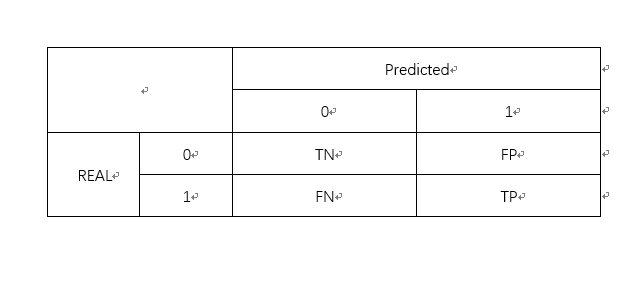

####   Precision = TP / (TP + FP)     Recall = TP / (TP + FN)

In [24]:
from sklearn.metrics import precision_score
precision_score(y_test, dt1_pred)

0.7816091954022989

In [25]:
206/(206+49)

0.807843137254902

In [26]:
from sklearn.metrics import recall_score
recall_score(y_test, dt1_pred)

0.7208480565371025

In [27]:
206 / (206 + 83)

0.71280276816609

9.As to credit prediction cases, we should distinguish the costs of misclassification as true and false, in order to improve the prediction accuracy. The consequences of misclassification have been assessed according to the average net profit per loan: the costs of a false positive (incorrectly saying an applicant is a good credit risk) outweigh the cost of a false negative (incorrectly saying an applicant is a bad credit risk) by a factor of five. This can be summarized in the following table. The cost matrix (“成本”) can be set in the model setting interface. Evaluate the performance of the models in terms of cost.

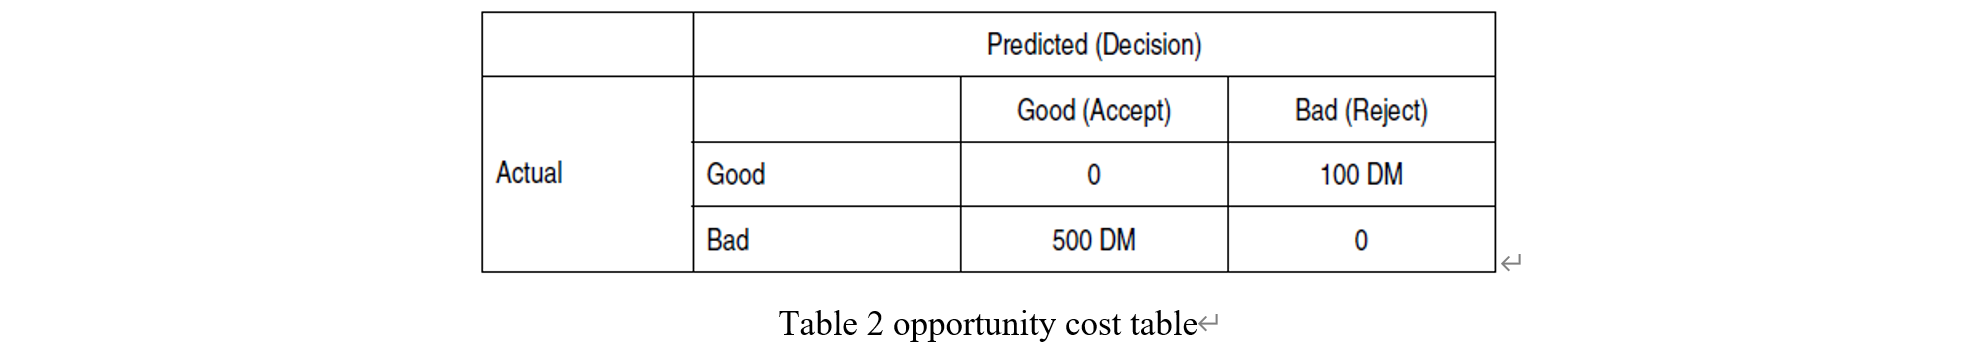

In [28]:
# calculate the confusion matrix with weights
def cal_cost(matrixC):
    cost = 500*matrixC[0][1]+100*matrixC[1][0]
    return cost
print("Cost of decsion tree with gini:   ", cal_cost(dt1C))
print("Cost of decsion tree with entropy:   ", cal_cost(dt2C))

print("Cost of linear kernel SVM:   ", cal_cost(svm1C))
print("Cost of rbf kernel SVM:   ", cal_cost(svm2C))

Cost of decsion tree with gini:    36400
Cost of decsion tree with entropy:    38300
Cost of linear kernel SVM:    34200
Cost of rbf kernel SVM:    34200
